In [1018]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD

In [1019]:
data1 = pd.read_csv("C:/Users/samba/OneDrive/Desktop/TAMU CORPUS/Driscoll/2021/kmeans/final_dataset_500.csv")
data1

,FID,0cc21,13cc21,25cc21,35cc21,41cc21,49cc21,55cc21,62cc21,69cc21,...,84eg21,91eg21,97eg21,106eg21,111eg21,116eg21,124eg21,yield,labels,eucledian distance
0,365,0.000613,0.236496,10.627635,15.895748,25.424783,40.554248,53.881360,59.374130,67.520195,...,0.228126,0.235167,0.242758,0.233351,0.215341,0.193017,0.003886,28.43,0,268.436893
1,75,0.280610,0.122537,6.506935,15.058079,19.065256,33.344280,45.702237,57.023033,69.943772,...,0.224815,0.229527,0.225507,0.231684,0.256969,0.260571,0.033436,38.87,0,271.811650
2,0,0.000000,0.136629,9.152873,16.199360,20.046592,33.231818,45.998476,55.128236,68.567596,...,0.229425,0.249003,0.250504,0.254987,0.258325,0.225403,0.015692,35.43,0,273.700782
3,364,0.001225,0.174615,9.781200,14.422192,23.922573,40.016137,53.990343,63.483098,69.435757,...,0.233776,0.237400,0.242964,0.237986,0.221650,0.208954,0.002942,29.09,0,276.577971
4,224,0.004289,0.682531,7.721550,13.444019,17.481481,29.110146,44.894267,58.465188,70.416208,...,0.223845,0.238556,0.235183,0.231161,0.246545,0.226566,0.016053,50.49,0,278.658313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2081,0.000000,0.000000,2.547782,8.866331,22.842547,36.547841,54.553233,54.123044,50.732771,...,0.085056,0.099122,0.120324,0.129234,0.142887,0.170229,0.025488,7.87,5,195.059623
596,1612,0.000000,0.000000,0.643804,2.721536,10.285981,22.680725,32.486511,37.016221,40.962596,...,0.085968,0.096746,0.115793,0.182997,0.168215,0.249445,0.040323,12.33,5,195.864196
597,1896,0.001838,0.013479,3.834172,9.219936,22.442985,35.252008,50.286737,52.102371,52.362792,...,0.096315,0.124234,0.059849,0.128342,0.132818,0.150084,0.011233,12.66,5,195.943615
598,384,0.026345,0.000000,0.440655,0.633440,3.767718,12.748282,19.980442,25.339199,34.977387,...,0.096522,0.124449,0.137496,0.176351,0.180169,0.240656,0.040501,20.25,5,196.184618


In [1020]:
data1 = data1.drop('labels',axis=1)
data1

,FID,0cc21,13cc21,25cc21,35cc21,41cc21,49cc21,55cc21,62cc21,69cc21,...,77eg21,84eg21,91eg21,97eg21,106eg21,111eg21,116eg21,124eg21,yield,eucledian distance
0,365,0.000613,0.236496,10.627635,15.895748,25.424783,40.554248,53.881360,59.374130,67.520195,...,0.212483,0.228126,0.235167,0.242758,0.233351,0.215341,0.193017,0.003886,28.43,268.436893
1,75,0.280610,0.122537,6.506935,15.058079,19.065256,33.344280,45.702237,57.023033,69.943772,...,0.243022,0.224815,0.229527,0.225507,0.231684,0.256969,0.260571,0.033436,38.87,271.811650
2,0,0.000000,0.136629,9.152873,16.199360,20.046592,33.231818,45.998476,55.128236,68.567596,...,0.231048,0.229425,0.249003,0.250504,0.254987,0.258325,0.225403,0.015692,35.43,273.700782
3,364,0.001225,0.174615,9.781200,14.422192,23.922573,40.016137,53.990343,63.483098,69.435757,...,0.212470,0.233776,0.237400,0.242964,0.237986,0.221650,0.208954,0.002942,29.09,276.577971
4,224,0.004289,0.682531,7.721550,13.444019,17.481481,29.110146,44.894267,58.465188,70.416208,...,0.245964,0.223845,0.238556,0.235183,0.231161,0.246545,0.226566,0.016053,50.49,278.658313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,2081,0.000000,0.000000,2.547782,8.866331,22.842547,36.547841,54.553233,54.123044,50.732771,...,0.057279,0.085056,0.099122,0.120324,0.129234,0.142887,0.170229,0.025488,7.87,195.059623
596,1612,0.000000,0.000000,0.643804,2.721536,10.285981,22.680725,32.486511,37.016221,40.962596,...,0.054917,0.085968,0.096746,0.115793,0.182997,0.168215,0.249445,0.040323,12.33,195.864196
597,1896,0.001838,0.013479,3.834172,9.219936,22.442985,35.252008,50.286737,52.102371,52.362792,...,0.075571,0.096315,0.124234,0.059849,0.128342,0.132818,0.150084,0.011233,12.66,195.943615
598,384,0.026345,0.000000,0.440655,0.633440,3.767718,12.748282,19.980442,25.339199,34.977387,...,0.080868,0.096522,0.124449,0.137496,0.176351,0.180169,0.240656,0.040501,20.25,196.184618


In [1021]:
data1 = data1.T

In [1022]:
data1 = data1.iloc[1:,:]
data1

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0cc21,0.000613,0.280610,0.000000,0.001225,0.004289,0.001225,0.003063,0.002451,0.001838,0.065557,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001838,0.026345,0.000000
13cc21,0.236496,0.122537,0.136629,0.174615,0.682531,0.151333,0.264067,0.174615,0.360259,0.175841,...,0.000000,0.000000,0.000000,0.005514,0.000000,0.000000,0.000000,0.013479,0.000000,0.000000
25cc21,10.627635,6.506935,9.152873,9.781200,7.721550,8.208505,7.576284,6.515293,9.657132,6.072855,...,1.949093,2.527054,1.083981,4.717574,1.864350,2.547782,0.643804,3.834172,0.440655,0.689529
35cc21,15.895748,15.058079,16.199360,14.422192,13.444019,11.729310,12.966004,14.606824,19.081238,14.264899,...,4.559061,8.254230,2.992155,9.841270,4.529797,8.866331,2.721536,9.219936,0.633440,1.314033
41cc21,25.424783,19.065256,20.046592,23.922573,17.481481,16.774882,16.720255,17.852766,24.522897,17.116903,...,15.627319,24.001219,11.992337,23.901235,15.707971,22.842547,10.285981,22.442985,3.767718,5.329928
49cc21,40.554248,33.344280,33.231818,40.016137,29.110146,34.340799,30.355020,32.481375,38.603218,31.106069,...,28.090344,35.760506,26.979262,36.354922,27.643840,36.547841,22.680725,35.252008,12.748282,14.157102
55cc21,53.881360,45.702237,45.998476,53.990343,44.894267,48.385307,43.045877,45.595893,51.544432,46.256494,...,40.659617,54.578902,39.486054,53.001467,40.034226,54.553233,32.486511,50.286737,19.980442,24.625351
62cc21,59.374130,57.023033,55.128236,63.483098,58.465188,57.586825,57.213057,55.353361,58.732041,59.058612,...,42.184796,54.064646,46.903330,51.785411,41.276178,54.123044,37.016221,52.102371,25.339199,30.378089
69cc21,67.520195,69.943772,68.567596,69.435757,70.416208,75.333638,70.443530,70.607505,71.443976,72.294952,...,44.102423,51.807236,45.275028,50.498726,41.572546,50.732771,40.962596,52.362792,34.977387,39.893919
77cc21,81.989788,80.614888,81.813491,83.217415,81.927439,83.205590,83.437786,80.571889,82.944370,81.817791,...,45.770492,22.901371,40.614888,24.674012,38.771298,21.609245,24.485891,35.331363,40.379468,40.944907


In [1023]:
data1['average'] = data1.iloc[:,:].mean(axis=1)

In [1024]:
data1

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,average
0cc21,0.000613,0.280610,0.000000,0.001225,0.004289,0.001225,0.003063,0.002451,0.001838,0.065557,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001838,0.026345,0.000000,0.005604
13cc21,0.236496,0.122537,0.136629,0.174615,0.682531,0.151333,0.264067,0.174615,0.360259,0.175841,...,0.000000,0.000000,0.005514,0.000000,0.000000,0.000000,0.013479,0.000000,0.000000,0.235829
25cc21,10.627635,6.506935,9.152873,9.781200,7.721550,8.208505,7.576284,6.515293,9.657132,6.072855,...,2.527054,1.083981,4.717574,1.864350,2.547782,0.643804,3.834172,0.440655,0.689529,7.951302
35cc21,15.895748,15.058079,16.199360,14.422192,13.444019,11.729310,12.966004,14.606824,19.081238,14.264899,...,8.254230,2.992155,9.841270,4.529797,8.866331,2.721536,9.219936,0.633440,1.314033,12.921629
41cc21,25.424783,19.065256,20.046592,23.922573,17.481481,16.774882,16.720255,17.852766,24.522897,17.116903,...,24.001219,11.992337,23.901235,15.707971,22.842547,10.285981,22.442985,3.767718,5.329928,20.232485
49cc21,40.554248,33.344280,33.231818,40.016137,29.110146,34.340799,30.355020,32.481375,38.603218,31.106069,...,35.760506,26.979262,36.354922,27.643840,36.547841,22.680725,35.252008,12.748282,14.157102,36.259578
55cc21,53.881360,45.702237,45.998476,53.990343,44.894267,48.385307,43.045877,45.595893,51.544432,46.256494,...,54.578902,39.486054,53.001467,40.034226,54.553233,32.486511,50.286737,19.980442,24.625351,50.581273
62cc21,59.374130,57.023033,55.128236,63.483098,58.465188,57.586825,57.213057,55.353361,58.732041,59.058612,...,54.064646,46.903330,51.785411,41.276178,54.123044,37.016221,52.102371,25.339199,30.378089,61.661058
69cc21,67.520195,69.943772,68.567596,69.435757,70.416208,75.333638,70.443530,70.607505,71.443976,72.294952,...,51.807236,45.275028,50.498726,41.572546,50.732771,40.962596,52.362792,34.977387,39.893919,73.413857
77cc21,81.989788,80.614888,81.813491,83.217415,81.927439,83.205590,83.437786,80.571889,82.944370,81.817791,...,22.901371,40.614888,24.674012,38.771298,21.609245,24.485891,35.331363,40.379468,40.944907,79.671452


In [1025]:
data1 = data1[0:17]

In [1026]:
data1

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,average
0cc21,0.000613,0.280610,0.000000,0.001225,0.004289,0.001225,0.003063,0.002451,0.001838,0.065557,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001838,0.026345,0.000000,0.005604
13cc21,0.236496,0.122537,0.136629,0.174615,0.682531,0.151333,0.264067,0.174615,0.360259,0.175841,...,0.000000,0.000000,0.005514,0.000000,0.000000,0.000000,0.013479,0.000000,0.000000,0.235829
25cc21,10.627635,6.506935,9.152873,9.781200,7.721550,8.208505,7.576284,6.515293,9.657132,6.072855,...,2.527054,1.083981,4.717574,1.864350,2.547782,0.643804,3.834172,0.440655,0.689529,7.951302
35cc21,15.895748,15.058079,16.199360,14.422192,13.444019,11.729310,12.966004,14.606824,19.081238,14.264899,...,8.254230,2.992155,9.841270,4.529797,8.866331,2.721536,9.219936,0.633440,1.314033,12.921629
41cc21,25.424783,19.065256,20.046592,23.922573,17.481481,16.774882,16.720255,17.852766,24.522897,17.116903,...,24.001219,11.992337,23.901235,15.707971,22.842547,10.285981,22.442985,3.767718,5.329928,20.232485
49cc21,40.554248,33.344280,33.231818,40.016137,29.110146,34.340799,30.355020,32.481375,38.603218,31.106069,...,35.760506,26.979262,36.354922,27.643840,36.547841,22.680725,35.252008,12.748282,14.157102,36.259578
55cc21,53.881360,45.702237,45.998476,53.990343,44.894267,48.385307,43.045877,45.595893,51.544432,46.256494,...,54.578902,39.486054,53.001467,40.034226,54.553233,32.486511,50.286737,19.980442,24.625351,50.581273
62cc21,59.374130,57.023033,55.128236,63.483098,58.465188,57.586825,57.213057,55.353361,58.732041,59.058612,...,54.064646,46.903330,51.785411,41.276178,54.123044,37.016221,52.102371,25.339199,30.378089,61.661058
69cc21,67.520195,69.943772,68.567596,69.435757,70.416208,75.333638,70.443530,70.607505,71.443976,72.294952,...,51.807236,45.275028,50.498726,41.572546,50.732771,40.962596,52.362792,34.977387,39.893919,73.413857
77cc21,81.989788,80.614888,81.813491,83.217415,81.927439,83.205590,83.437786,80.571889,82.944370,81.817791,...,22.901371,40.614888,24.674012,38.771298,21.609245,24.485891,35.331363,40.379468,40.944907,79.671452


In [1027]:
data1['average_cc'] = data1['average']

C:\Users\samba\.conda\envs\env2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [1028]:
data1

,0,1,2,3,4,5,6,7,8,9,...,592,593,594,595,596,597,598,599,average,average_cc
0cc21,0.000613,0.280610,0.000000,0.001225,0.004289,0.001225,0.003063,0.002451,0.001838,0.065557,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001838,0.026345,0.000000,0.005604,0.005604
13cc21,0.236496,0.122537,0.136629,0.174615,0.682531,0.151333,0.264067,0.174615,0.360259,0.175841,...,0.000000,0.005514,0.000000,0.000000,0.000000,0.013479,0.000000,0.000000,0.235829,0.235829
25cc21,10.627635,6.506935,9.152873,9.781200,7.721550,8.208505,7.576284,6.515293,9.657132,6.072855,...,1.083981,4.717574,1.864350,2.547782,0.643804,3.834172,0.440655,0.689529,7.951302,7.951302
35cc21,15.895748,15.058079,16.199360,14.422192,13.444019,11.729310,12.966004,14.606824,19.081238,14.264899,...,2.992155,9.841270,4.529797,8.866331,2.721536,9.219936,0.633440,1.314033,12.921629,12.921629
41cc21,25.424783,19.065256,20.046592,23.922573,17.481481,16.774882,16.720255,17.852766,24.522897,17.116903,...,11.992337,23.901235,15.707971,22.842547,10.285981,22.442985,3.767718,5.329928,20.232485,20.232485
49cc21,40.554248,33.344280,33.231818,40.016137,29.110146,34.340799,30.355020,32.481375,38.603218,31.106069,...,26.979262,36.354922,27.643840,36.547841,22.680725,35.252008,12.748282,14.157102,36.259578,36.259578
55cc21,53.881360,45.702237,45.998476,53.990343,44.894267,48.385307,43.045877,45.595893,51.544432,46.256494,...,39.486054,53.001467,40.034226,54.553233,32.486511,50.286737,19.980442,24.625351,50.581273,50.581273
62cc21,59.374130,57.023033,55.128236,63.483098,58.465188,57.586825,57.213057,55.353361,58.732041,59.058612,...,46.903330,51.785411,41.276178,54.123044,37.016221,52.102371,25.339199,30.378089,61.661058,61.661058
69cc21,67.520195,69.943772,68.567596,69.435757,70.416208,75.333638,70.443530,70.607505,71.443976,72.294952,...,45.275028,50.498726,41.572546,50.732771,40.962596,52.362792,34.977387,39.893919,73.413857,73.413857
77cc21,81.989788,80.614888,81.813491,83.217415,81.927439,83.205590,83.437786,80.571889,82.944370,81.817791,...,40.614888,24.674012,38.771298,21.609245,24.485891,35.331363,40.379468,40.944907,79.671452,79.671452


In [1029]:
data2 = data1['average_cc']

In [1030]:
data2

0cc21       0.005604
13cc21      0.235829
25cc21      7.951302
35cc21     12.921629
41cc21     20.232485
49cc21     36.259578
55cc21     50.581273
62cc21     61.661058
69cc21     73.413857
77cc21     79.671452
84cc21     79.614387
91cc21     83.962038
97cc21     86.381124
111cc21    87.765194
116cc21    91.035166
121cc21    85.312475
124cc21    83.587498
Name: average_cc, dtype: float64

In [981]:
data2 = pd.DataFrame(data2)

In [982]:
dataset_train = data2[0:13]
dataset_test = data2[13:16]

In [983]:
training_set = data2.iloc[0:13,:].values
training_set

array([[5.60387696e-03],
       [2.35829336e-01],
       [7.95130212e+00],
       [1.29216294e+01],
       [2.02324846e+01],
       [3.62595777e+01],
       [5.05812729e+01],
       [6.16610578e+01],
       [7.34138573e+01],
       [7.96714517e+01],
       [7.96143868e+01],
       [8.39620376e+01],
       [8.63811245e+01]])

In [984]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [985]:
X_train = []
y_train = []
for i in range(1, 12):
    X_train.append(training_set_scaled[i-1:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [986]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

In [987]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=50))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(X_train,y_train,epochs=50,batch_size=4)

Epoch 1/50
3/3 [==============================] - 4s 6ms/step - loss: 0.4049
Epoch 2/50
3/3 [==============================] - 0s 4ms/step - loss: 0.3936
Epoch 3/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3848
Epoch 4/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3726
Epoch 5/50
3/3 [==============================] - 0s 4ms/step - loss: 0.3607
Epoch 6/50
3/3 [==============================] - 0s 3ms/step - loss: 0.3443
Epoch 7/50
3/3 [==============================] - 0s 4ms/step - loss: 0.3326
Epoch 8/50
3/3 [==============================] - 0s 4ms/step - loss: 0.3170
Epoch 9/50
3/3 [==============================] - 0s 4ms/step - loss: 0.3001
Epoch 10/50
3/3 [==============================] - 0s 4ms/step - loss: 0.2789
Epoch 11/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2562
Epoch 12/50
3/3 [==============================] - 0s 3ms/step - loss: 0.2272
Epoch 13/50
3/3 [==============================] - 0s 4ms/step - loss: 0.

In [988]:
real_average_cc = data2.iloc[13:17,:].values

In [989]:
real_average_cc

array([[87.76519396],
       [91.03516623],
       [85.31247469],
       [83.58749765]])

In [990]:
dataset_total = pd.concat((dataset_train['average_cc'], dataset_test['average_cc']), axis = 0)

In [991]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 1:].values

In [992]:
inputs = inputs.reshape(-1,1)

In [993]:
inputs = sc.transform(inputs)

In [994]:
X_test = []
for i in range(1, 5):
    X_test.append(inputs[i-1:i, 0])

In [995]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_average_cc = model.predict(X_test)
predicted_average_cc = sc.inverse_transform(predicted_average_cc)

1/1 [==============================] - 1s 834ms/step


In [996]:
predicted_average_cc

array([[ 96.93126 ],
       [ 98.8106  ],
       [103.321815],
       [ 95.49273 ]], dtype=float32)

In [997]:
real_average_cc

array([[87.76519396],
       [91.03516623],
       [85.31247469],
       [83.58749765]])

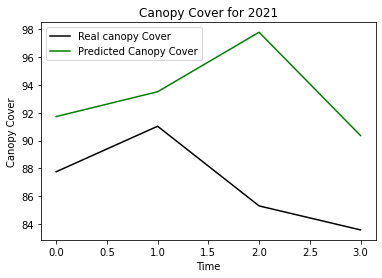

In [945]:
plt.plot(real_average_cc, color = 'black', label = 'Real canopy Cover')
plt.plot(predicted_average_cc, color = 'green', label = 'Predicted Canopy Cover')
plt.title('Canopy Cover for 2021')
plt.xlabel('Time')
plt.ylabel('Canopy Cover')
plt.legend()
plt.show()

In [1000]:
#GRU Implementation
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9, nesterov=False),loss='mean_squared_error')
# Fitting to the training set
regressorGRU.fit(X_train,y_train,epochs=50,batch_size=8)

Epoch 1/50


C:\Users\samba\.conda\envs\env2\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


2/2 [==============================] - 4s 15ms/step - loss: 0.4040
Epoch 2/50
2/2 [==============================] - 0s 6ms/step - loss: 0.3395
Epoch 3/50
2/2 [==============================] - 0s 4ms/step - loss: 0.2605
Epoch 4/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1761
Epoch 5/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1239
Epoch 6/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1212
Epoch 7/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1450
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1657
Epoch 9/50
2/2 [==============================] - 0s 5ms/step - loss: 0.1756
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1465
Epoch 11/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1494
Epoch 12/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1386
Epoch 13/50
2/2 [==============================] - 0s 4ms/step - loss: 0.1222
Epoch

In [1001]:
regressorGRU.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 1, 50)             7950      
                                                                 
 dropout_172 (Dropout)       (None, 1, 50)             0         
                                                                 
 gru_1 (GRU)                 (None, 1, 50)             15300     
                                                                 
 dropout_173 (Dropout)       (None, 1, 50)             0         
                                                                 
 gru_2 (GRU)                 (None, 1, 50)             15300     
                                                                 
 dropout_174 (Dropout)       (None, 1, 50)             0         
                                                                 
 gru_3 (GRU)                 (None, 50)              

In [1002]:
real_average_cc = data2.iloc[13:17,:].values
real_average_cc

array([[87.76519396],
       [91.03516623],
       [85.31247469],
       [83.58749765]])

In [1003]:
dataset_total = pd.concat((dataset_train['average_cc'], dataset_test['average_cc']), axis = 0)

In [1004]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 1:].values

In [1005]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [1006]:
X_test = []
for i in range(1, 5):
    X_test.append(inputs[i-1:i, 0])

In [1007]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_average_cc = regressorGRU.predict(X_test)
predicted_average_cc = sc.inverse_transform(predicted_average_cc)

1/1 [==============================] - 1s 778ms/step


In [1008]:
predicted_average_cc

array([[45.026176],
       [45.04744 ],
       [45.09767 ],
       [45.00975 ]], dtype=float32)

In [1010]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from numpy import array

In [1011]:
def exp_smoothing_forecast(history, config):
	t,d,s,p,b,r = config
	# define model
	history = array(history)
	model = ExponentialSmoothing(history, trend=t, damped=d, seasonal=s, seasonal_periods=p)
	# fit model
	model_fit = model.fit(optimized=True, use_boxcox=b, remove_bias=r)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]

In [1012]:
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

In [1013]:
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

In [1014]:
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = exp_smoothing_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error

In [1015]:
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

In [1016]:
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

In [1017]:
# create a set of exponential smoothing configs to try
def exp_smoothing_configs(seasonal=[None]):
	models = list()
	# define config lists
	t_params = ['add', 'mul', None]
	d_params = [True, False]
	s_params = ['add', 'mul', None]
	p_params = seasonal
	b_params = [True, False]
	r_params = [True, False]
	# create config instances
	for t in t_params:
		for d in d_params:
			for s in s_params:
				for p in p_params:
					for b in b_params:
						for r in r_params:
							cfg = [t,d,s,p,b,r]
							models.append(cfg)
	return models

In [ ]:
if __name__ == '__main__':
	# define dataset
	data = data2.to_numpy()
	print(data)
	# data split
	n_test = 4
	# model configs
	cfg_list = exp_smoothing_configs()
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	# list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

[5.60387696e-03 2.35829336e-01 7.95130212e+00 1.29216294e+01
 2.02324846e+01 3.62595777e+01 5.05812729e+01 6.16610578e+01
 7.34138573e+01 7.96714517e+01 7.96143868e+01 8.39620376e+01
 8.63811245e+01 8.77651940e+01 9.10351662e+01 8.53124747e+01
 8.35874977e+01]
